In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# TASK 1 (revising histograms)
Try to create (through code) a grayscale image of 100 by 256 pixels, which contains a gradient from black (0) to white (255) as can seen below. Hint: use a for loop. Display the image and then plot its histogram. What does its histogram look like and why?

Histogram is a straight line as all colours are shown exactly the same amounts, Normalisation will not work as both extremes are already not 0

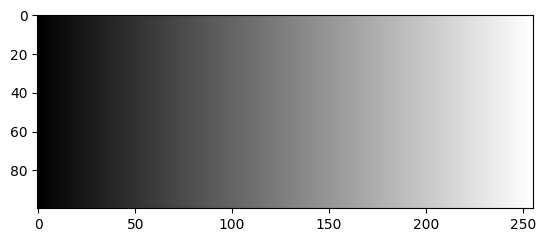

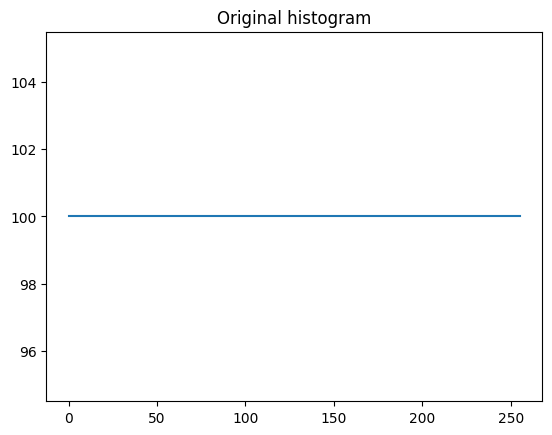

In [2]:
Gradient = np.zeros((100, 256), dtype=np.uint8)
Gradient[:] = np.linspace(0, 255, 256, dtype=np.uint8)
plt.imshow(Gradient, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title('Original histogram')
hist = cv2.calcHist([Gradient], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()


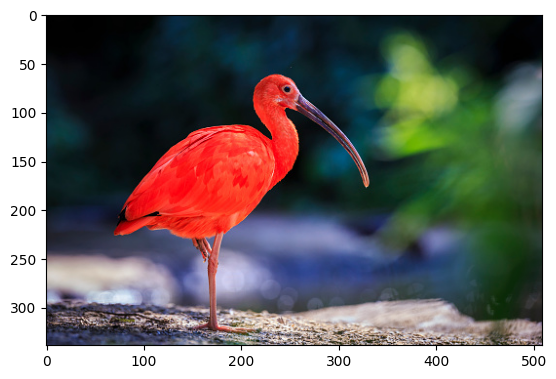

In [3]:
imBGR = cv2.imread('images/bird2.jpg')
imRGB = np.zeros_like(imBGR)
imRGB[:,:,0] = imBGR[:,:, 2]
imRGB[:,:,1] = imBGR[:,:, 1]
imRGB[:,:,2] = imBGR[:,:, 0]

plt.imshow(imRGB)

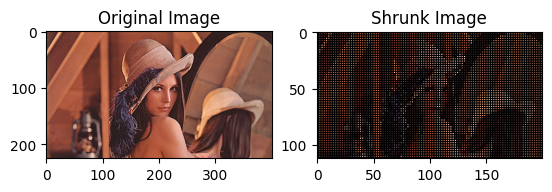

In [4]:
imBGR = cv2.imread('images/lena.jpg')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
shrunkRGB = np.zeros((imRGB.shape[0]//2, imRGB.shape[1]//2, 3), dtype=imRGB.dtype)

for x in range(0, shrunkRGB.shape[0], 2):
    for y in range(0, shrunkRGB.shape[1], 2):
        shrunkRGB[x, y, :] = imRGB[(x*2), (y*2), :]

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(imRGB)
plt.subplot(1, 2, 2)
plt.title('Shrunk Image')
plt.imshow(shrunkRGB)

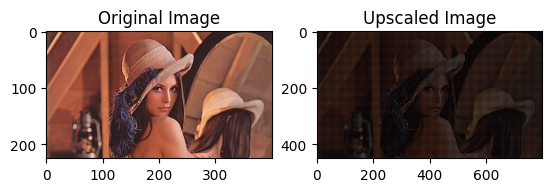

In [5]:
imBGR = cv2.imread('images/lena.jpg')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)
bigRGB = np.zeros((imRGB.shape[0]*2, imRGB.shape[1]*2, 3), dtype=imRGB.dtype)

for x in range(0, imRGB.shape[0], 2):
    for y in range(0, imRGB.shape[1], 2):
        bigRGB[(x*2), (y*2), :] = imRGB[x, y, :]
        bigRGB[(x*2)+1, (y*2), :] = imRGB[x, y, :]
        bigRGB[(x*2), (y*2)+1, :] = imRGB[x, y, :]
        bigRGB[(x*2)+1, (y*2)+1, :] = imRGB[x, y, :]


plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(imRGB)
plt.subplot(1, 2, 2)
plt.title('Upscaled Image')
plt.imshow(bigRGB)

In [ ]:
imBGR = cv2.imread('images/bird2.jpg')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('top','image',0,180,nothing)
cv2.createTrackbar('left','image',0,255,nothing)
cv2.createTrackbar('bottom','image',0,255,nothing)
cv2.createTrackbar('right','image',0,180,nothing)
Result_BGR = imBGR.copy()
while(1):
    cv2.imshow('image',Result_BGR)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    top = cv2.getTrackbarPos('top','image')
    left = cv2.getTrackbarPos('left','image')
    bottom = cv2.getTrackbarPos('bottom','image')
    right = cv2.getTrackbarPos('right','image')
    

    croppedRGB = imRGB[top:imRGB.shape[0]-bottom, left:imRGB.shape[1]-right, :]
    Result_BGR = cv2.cvtColor(croppedRGB, cv2.COLOR_RGB2BGR)

cv2.destroyAllWindows()